In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import sympy as sm
import func
import time
%reload_ext line_profiler

In [2]:
def utility(c,theta):
    ''' Utility function for consumption including the limit case for rho->1 '''
    '''not actually used because direct calculation is faster'''
    if c<0:
        raise error
    if rho !=1 :
        return (c**(1-theta)-1)/(1-theta)
    else:
        return np.log(c)

def total_utility(c, weight, theta):
    '''
    Sums utility for c for multiple years
    c is an array 
    '''
    uts = (c**(1-theta)-1)/(1-theta)
    # sum of utitity
    t_u = np.dot(uts,weight)
    
    return t_u

def prod(k,l,alpha,b):
    return (b*k**alpha)*(l**(1-alpha))

assert np.allclose(total_utility1(c, beta, theta),total_utility2(c, beta, theta))

times = 500000
def loop1(times):
    for i in range(times):
        total_utility1(c, beta, theta)
        
def loop2(times):
    for i in range(times):
        total_utility2(c, beta, theta)

%lprun -f total_utility1 -f loop1 loop1(times)

%lprun -f total_utility2 -f loop2 loop2(times)

In [3]:
def tot_ut_sk(sk,t, k0, l, b, weight, alpha, theta, delta, quick=True):
    '''
    Returns utitlity for  given period 
    depending on initial amount of kapital, k0,
    and a fixed savingsrate, sk, for all periods 
    '''
    k_short = np.empty(t)
    c_short = np.empty(t)
    y_short = np.empty(t)
    k_short[0] = k0
    for i in range(t):
        y_short[i] = prod(k_short[i],l[i],alpha,b)
        c_short[i]=(1-sk)*y_short[i]
        if i+1<t:
            k_short[i+1]=sk*y_short[i]+(1-delta)*k_short[i] 
    if quick:
        return total_utility(c_short,weight,theta)
    else:
        return k_short,c_short,y_short

def opt_sk(t, b, weight, delta, alpha, theta, k0,l):
    '''Finds optimal fixed savings rate, sk, 
    for maximal total utility '''
    obj = lambda sk: -tot_ut_sk(sk,t,k0, l, b, weight, alpha, theta, delta)
    res = optimize.minimize_scalar(obj, alpha, method='bounded',bounds=[0,1])
    return res.x

# Fast opsparingsrate

analytisk

In [4]:
sm.init_printing(use_unicode=True)

In [5]:
#valgmuligheder:
# andelen af mulig arbejdstid som bruges på forskning:
sr = sm.symbols('s_Rt')
# I starten antages kapitalopspsparingsraten at være konstant
sk = sm.symbols('s_Kt')
# Ud fra de valg nogle udfald
# Først defineres variable
l = sm.symbols('L_{t}')
ly = sm.symbols('L_{Yt}')
la = sm.symbols('L_{At}')
alpha = sm.symbols('alpha')
k =sm.symbols('K_{t}')
k1 = sm.symbols('K_{t+1}')
y = sm.symbols('Y_{t}')
c = sm.symbols('C')
ct = sm.symbols('C_{t}')
a = sm.symbols('A_{t}')
a1 = sm.symbols('A_{t+1}')
r = sm.symbols('r')

#Greek:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')
theta = sm.symbols('theta')

t = sm.symbols('t')
ts = sm.symbols('T')
# Functions:
uc = sm.Function('u')(ct) 
u = sm.Function('U')(c)

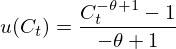

In [6]:
sm.Eq(uc,(ct**(1-theta)-1)/(1-theta))

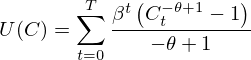

In [7]:
sm.Eq(u,sm.Sum(beta**t*(ct**(1-theta)-1)/(1-theta),(t,0,ts)))

In [8]:
sm.init_printing(use_unicode=False)

Nummerisk

In [9]:
theta = 0.5
alpha = 1/3
delta = 0.05
rho = 0.5
n=0.008

In [10]:
t = 100
b = 10
k0 = 10
l = [(1+n)**i for i in range(t)]
beta = 0.9
weight = np.array([beta**i for i in range(t)])
c = np.random.normal(100,1,t)
sks  = alpha

In [11]:
tot_ut_sk(sks,t, k0, l, b, weight, alpha, theta, delta, quick=True)

In [12]:
n = 100
ks = np.linspace(0.0001,300,n)
sks = np.zeros(n)
for i,k in enumerate(ks):
    sks[i] = opt_sk(t, b, weight,delta,alpha,theta,k,l)

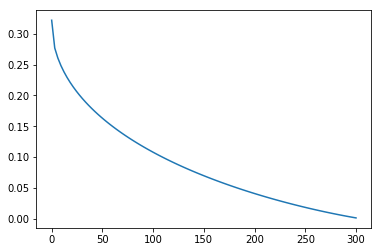

In [13]:
func.plot(ks,sks)

# Need speed?

In [14]:
def opt_sk1(t, b, weight, delta, alpha, theta, k0, l):
    '''Finds optimal fixed savings rate, sk, 
    for maximal total utility '''
    obj = lambda sk: -tot_ut_sk(sk,t,k0, l, b, weight, alpha, theta, delta)
    res = optimize.minimize_scalar(obj, alpha, method='bounded',bounds=[0,1])
    return res.x

In [15]:
def loop1(n):
    for i in range(n):
        opt_sk1(t, b, beta, delta, alpha, theta, k0,l)

In [16]:
#%lprun -f opt_sk1 -f loop1 loop1(n)

# Varierende opsparingsrate

In [17]:
def tot_ut_multiple_sks(sks, k0, l, b, weight, theta, alpha, delta, simple=True):
    '''
    Finds total utitilty for a set of years with a savingsrate for each year
    '''
    t = len(sks)
    k_short = np.empty(t)
    k_short[0] = k0
    
    for i in range(1,t):    
        k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1],alpha,b)+(1-delta)*k_short[i-1]
    
    y_short = prod(k_short,l,alpha,b)
    if simple:
        return total_utility(y_short*(1-sks)/l, weight, theta)
    else:
        return total_utility(y_short*(1-sks)/l, weight, theta), y_short, y_short*(1-sks), k_short

In [18]:
def tot_ut_multiple_sks_quick(sks, k0, l, b, weight, theta, alpha, delta):
    '''
    Finds total utitilty for a set of years with a savingsrate for each year
    '''
    t = len(sks)
    k_short = np.empty(t)
    k_short[0] = k0
    
    for i in range(1,t):    
        k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1],alpha,b)+(1-delta)*k_short[i-1]
    
    y_short = prod(k_short,l,alpha,b)
    
    return total_utility(y_short*(1-sks)/l, weight, theta)

In [19]:
theta = 0.9
alpha = 1/3
delta = 0.05
beta = 1
n = 0.01
b = 10
k0 = 1
l0 = 1



In [20]:
t = 50
l = np.array([l0*(1+n)**i for i in range(t)])
weight = np.array([beta**i for i in range(t)])

obj = lambda sks: -tot_ut_multiple_sks_quick(sks, k0, l, b, weight, theta, alpha, delta)
sks0 = np.full(t,alpha)
sks0[-1] = 0
bounds = np.full((t,2),[0,1])


res = optimize.minimize(obj, sks0, method='SLSQP', bounds=bounds)

print(f'Optimal sk')
np.set_printoptions(precision=4,suppress=True)
print(res.x)
print('Total utility:')
print(f'{-res.fun:.4f}')

Optimal sk
[0.6309 0.6264 0.6028 0.5775 0.5537 0.5323 0.5127 0.4949 0.4787 0.4637
 0.4498 0.4369 0.4247 0.4132 0.4022 0.3918 0.3816 0.3717 0.362  0.3524
 0.3428 0.3331 0.3232 0.3132 0.3028 0.2919 0.2806 0.2685 0.2555 0.2414
 0.226  0.2092 0.1905 0.1695 0.1457 0.1184 0.0866 0.049  0.004  0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
Total utility:
218.9665


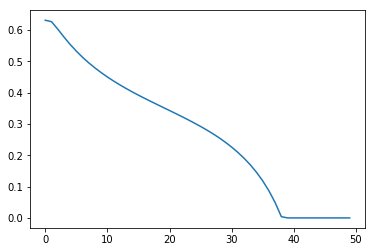

In [21]:
func.plot(range(t),res.x)

In [22]:
def optimal_sks(t, b, l, weight, delta, alpha, theta, k0, first=True):
    obj = lambda sks: -tot_ut_multiple_sks_quick(sks, k0, l, b, weight, theta, alpha, delta)
    sks0 = np.linspace(alpha,0,t)

    bounds = np.full((t,2),[0,1])
    res = optimize.minimize(obj, sks0, method='SLSQP', bounds=bounds)
    if res.success == False:
        print('Optimization was sadly not succesfull')
    elif first:
        return res.x[0]
    else:
        return res.x

In [23]:
theta = 0.9
alpha = 1/3
delta = 0.05
beta = 1
b = 2
n = 0.01
beta = 0.99
k0 = 20
l0 = 1
t = 200
l = np.array([l0*(1+n)**i for i in range(t)])
weight = np.array([beta**i for i in range(t)])

In [24]:
sks = optimal_sks(t, b, l, weight, delta, alpha, theta, k0, first=False)
total, y, c, k = tot_ut_multiple_sks(sks, k0, l, b, weight, theta, alpha, delta, simple=False)

In [25]:
sks_alt = np.array([alpha for i in list(range(t))])
total_alt, y_alt, c_alt, k_alt = tot_ut_multiple_sks(sks_alt, k0, l, b, weight, theta, alpha, delta, simple=False)

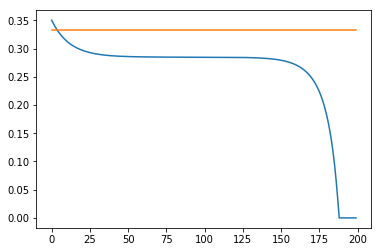

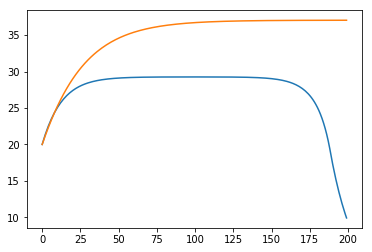

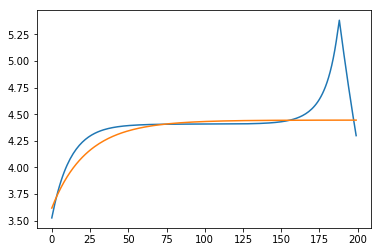

In [26]:
func.plot2(range(t),sks,sks_alt)
func.plot2(range(t),k/l,k_alt/l)
func.plot2(range(t),c/l,c_alt/l)

In [27]:
n = 50
ks = np.linspace(0.1,100,50)
sks1 = np.empty(50)

for i, k in enumerate(ks):
    sks1[i] = optimal_sks(t, b, l, weight, delta, alpha, theta, k)

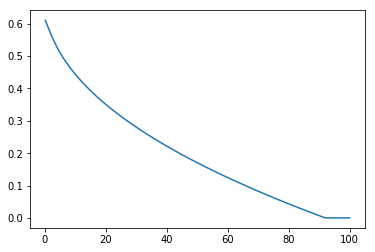

In [28]:
func.plot(ks,sks1)

In [29]:
n= 20
ks = np.linspace(1,600,20)
sks1 = np.empty(20)

for i, k in enumerate(ks):
    sks1[i] = optimal_sks(t, b, l, weight, delta, alpha, theta, k)

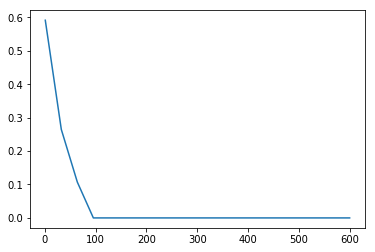

In [30]:
func.plot(ks,sks1)

In [31]:
ns = [-0.1,0,0.01,0.02,0.05,0.1,0.2]
sks1 = np.empty(len(ns))
for i,n in enumerate(ns):
    l = np.array([l0*(1+n)**i for i in range(t)])
    sks1[i] = optimal_sks(t, b, l, weight, delta, alpha, theta, k0)
    

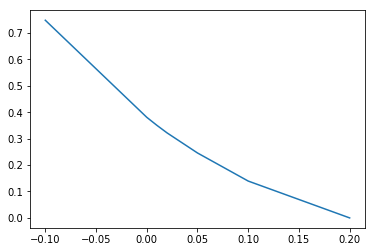

In [32]:
func.plot(ns,sks1)

# Need for speed

In [33]:
def tot_ut_multiple_sks1(sks, k0, l, b, weight, theta, alpha, delta, simple=True):
    '''
    Finds total utitilty for a set of years with a savingsrate for each year
    '''
    t = len(sks)
    k_short = np.empty(t)
    k_short[0] = k0
    
    for i in range(1,t):    
        k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1],alpha,b)+(1-delta)*k_short[i-1]
    
    y_short = prod(k_short,l,alpha,b)
    if simple:
        return total_utility(y_short*(1-sks)/l, weight, theta)
    else:
        return total_utility(y_short*(1-sks)/l, weight, theta), y_short, y_short*(1-sks), k_short


def tot_ut_multiple_sks2(sks, k0, l, b, weight, theta, alpha, delta):
    '''
    Finds total utitilty for a set of years with a savingsrate for each year
    '''
    t = len(sks)
    k_short = np.empty(t)
    k_short[0] = k0
    
    for i in range(1,t):    
        k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1],alpha,b)+(1-delta)*k_short[i-1]
    
    y_short = prod(k_short,l,alpha,b)
    
    return total_utility(y_short*(1-sks)/l, weight, theta)


In [34]:
n = 0.005

In [35]:
t = 60
l = np.array([(1+n)**i for i in range(t)])
weight = np.array([beta**i for i in range(t)])
sks = np.full(t,alpha)
k = np.full(t,10)

In [36]:
times = 100

In [37]:
assert np.allclose(tot_ut_multiple_sks1(sks, k0, l, b, weight, theta, alpha, delta),tot_ut_multiple_sks2(sks, k0, l, b, weight, theta, alpha, delta))
                   
def loop1(times):
    for i in range(times):
        tot_ut_multiple_sks1(sks, k0, l, b, weight, theta, alpha, delta)
        
def loop2(times):
    for i in range(times):
        tot_ut_multiple_sks2(sks, k0, l, b, weight, theta, alpha, delta)

In [38]:
tot_ut_multiple_sks1(sks, k0, l, b, weight, theta, alpha, delta)

In [39]:
%timeit loop1(times)
%timeit loop2(times)

14.1 ms ± 476 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.3 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%lprun -f tot_ut_multiple_sks1 -f loop1 loop1(times)

Timer unit: 1e-06 s

Total time: 0.03645 s
File: <ipython-input-33-0dd545985c8d>
Function: tot_ut_multiple_sks1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def tot_ut_multiple_sks1(sks, k0, l, b, weight, theta, alpha, delta, simple=True):
     2                                               '''
     3                                               Finds total utitilty for a set of years with a savingsrate for each year
     4                                               '''
     5       100        135.0      1.4      0.4      t = len(sks)
     6       100        604.0      6.0      1.7      k_short = np.empty(t)
     7       100        153.0      1.5      0.4      k_short[0] = k0
     8                                               
     9      6000       4246.0      0.7     11.6      for i in range(1,t):    
    10      5900      25569.0      4.3     70.1          k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1

In [41]:
%lprun -f tot_ut_multiple_sks2 -f loop2 loop2(times)

Timer unit: 1e-06 s

Total time: 0.027266 s
File: <ipython-input-33-0dd545985c8d>
Function: tot_ut_multiple_sks2 at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           def tot_ut_multiple_sks2(sks, k0, l, b, weight, theta, alpha, delta):
    20                                               '''
    21                                               Finds total utitilty for a set of years with a savingsrate for each year
    22                                               '''
    23       100         95.0      0.9      0.3      t = len(sks)
    24       100        354.0      3.5      1.3      k_short = np.empty(t)
    25       100        115.0      1.1      0.4      k_short[0] = k0
    26                                               
    27      6000       3220.0      0.5     11.8      for i in range(1,t):    
    28      5900      19478.0      3.3     71.4          k_short[i]=sks[i-1]*prod(k_short[i-1],l[i-1],alpha,b)+

In [42]:
def optimal_sks2(t, b, l, weight, delta, alpha, theta, k0, first=True):
    obj = lambda sks: -tot_ut_multiple_sks2(sks, k0, l, b, weight, theta, alpha, delta)
    sks0 = np.linspace(alpha,0,t)

    bounds = np.full((t,2),[0,1])
    res = optimize.minimize(obj, sks0, method='L-BFGS-B', bounds=bounds)
    if res.success == False:
        print('Optimization was sadly not succesfull')
    elif first:
        return res.x[0]
    else:
        return res.x

In [43]:
optimal_sks2(t, b, l, weight, delta, alpha, theta, k0)

In [44]:
optimal_sks(t, b, l, weight, delta, alpha, theta, k0)

In [45]:
times = 5

In [46]:
assert np.allclose(tot_ut_multiple_sks_quick(optimal_sks(t, b, l, weight, delta, alpha, theta, k0, first =False), k0, l, b, weight, theta, alpha, delta),tot_ut_multiple_sks_quick(optimal_sks2(t, b, l, weight, delta, alpha, theta, k0, first =False), k0, l, b, weight, theta, alpha, delta))
    
def loop1(times):
    for i in range(times):
        optimal_sks(t, b, l, weight, delta, alpha, theta, k0)
        
def loop2(times):
    for i in range(times):
        optimal_sks2(t, b, l, weight, delta, alpha, theta, k0)

In [47]:
%timeit loop1(times)
%timeit loop2(times)

476 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
543 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
%lprun -f optimal_sks -f loop1 loop1(times)

Timer unit: 1e-06 s

Total time: 0.701143 s
File: <ipython-input-22-be530121cece>
Function: optimal_sks at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def optimal_sks(t, b, l, weight, delta, alpha, theta, k0, first=True):
     2         5          7.0      1.4      0.0      obj = lambda sks: -tot_ut_multiple_sks_quick(sks, k0, l, b, weight, theta, alpha, delta)
     3         5        441.0     88.2      0.1      sks0 = np.linspace(alpha,0,t)
     4                                           
     5         5        130.0     26.0      0.0      bounds = np.full((t,2),[0,1])
     6         5     700474.0 140094.8     99.9      res = optimize.minimize(obj, sks0, method='SLSQP', bounds=bounds)
     7         5         71.0     14.2      0.0      if res.success == False:
     8                                                   print('Optimization was sadly not succesfull')
     9         5          4.0      0.8     